# Exercices : comprendre l'enchainement des étapes d'un projet de ML

## 1. Prédire simplement si un vin est rouge ou blanc

Voici un mini-exercice pour pratiquer ce que vous avez appris !

Étapes à suivre :
1. Créer un dataset synthétique de vins
2. Le diviser en train/test
3. Standardiser les données
4. Entraîner un modèle KNN
5. Évaluer sa performance

In [ ]:
## TO DO
# --- Solution de l'exercice ---
print("\n=== SOLUTION DE L'EXERCICE ===\n")

# Étape 1 : Création d'un dataset synthétique
from sklearn.datasets import make_classification

X_vin, y_vin = make_classification(
    n_samples=200,           # 200 vins
    n_features=4,            # 4 caractéristiques
    n_informative=3,         # 3 sont vraiment utiles
    n_redundant=1,           # 1 est redondante
    n_classes=2,             # 2 classes : rouge ou blanc
    random_state=42
)

print("Dataset créé : 200 vins avec 4 caractéristiques")
print(f"Forme des données : {X_vin.shape}")

In [ ]:
# Étape 2 : Division train/test
X_train_vin, X_test_vin, y_train_vin, y_test_vin = train_test_split(
    X_vin, y_vin, test_size=0.25, random_state=42
)
print(f"Données d'entraînement : {len(X_train_vin)} vins")
print(f"Données de test : {len(X_test_vin)} vins")


In [ ]:
# Étape 3 : Standardisation
scaler_vin = StandardScaler()
X_train_vin_scaled = scaler_vin.fit_transform(X_train_vin)
X_test_vin_scaled = scaler_vin.transform(X_test_vin)
print("✓ Données standardisées")


In [ ]:
# Étape 4 : Entraînement du modèle
knn_vin = KNeighborsClassifier(n_neighbors=5)
knn_vin.fit(X_train_vin_scaled, y_train_vin)
print("✓ Modèle KNN entraîné avec K=5")


In [ ]:
# Étape 5 : Évaluation
y_pred_vin = knn_vin.predict(X_test_vin_scaled)
accuracy_vin = accuracy_score(y_test_vin, y_pred_vin)
print(f"\n🎉 Précision finale : {accuracy_vin:.2%}")

print("\n" + "="*80)
print("FÉLICITATIONS ! Vous avez terminé ce notebook d'introduction au ML !")
print("="*80)

## 2. Retravailler le flow pour prédire si un vin est rouge ou blanc

**Objectif** :
Construire un modèle KNN capable de prédire si un vin est rouge (1) ou blanc (0)
à partir de ses caractéristiques chimiques.

Vous devez :

1. Générer un dataset synthétique réaliste
2. Diviser en train/test (avec stratify)
3. Entraîner un KNN sans scaling
4. Puis avec scaling
5. Comparer les performances
6. Trouver le meilleur k
7. Afficher la matrice de confusion

In [1]:
## TO DO
# --- Solution de l'exercice ---
print("\n=== SOLUTION DE L'EXERCICE ===\n")

# Étape 1 : Création d'un dataset synthétique
from sklearn.datasets import make_classification

X_vin, y_vin = make_classification(
    n_samples=200,           # 200 vins
    n_features=4,            # 4 caractéristiques
    n_informative=3,         # 3 sont vraiment utiles
    n_redundant=1,           # 1 est redondante
    n_classes=2,             # 2 classes : rouge ou blanc
    random_state=42
)

print("Dataset créé : 200 vins avec 4 caractéristiques")
print(f"Forme des données : {X_vin.shape}")


=== SOLUTION DE L'EXERCICE ===

Dataset créé : 200 vins avec 4 caractéristiques
Forme des données : (200, 4)


In [3]:
# Étape 2 : Division train/test avec statify
from sklearn.model_selection import train_test_split

X_train_vin, X_test_vin, y_train_vin, y_test_vin = train_test_split(
    X_vin, y_vin, test_size=0.25, random_state=42, stratify=y_vin
)
print(f"Données d'entraînement : {len(X_train_vin)} vins")
print(f"Données de test : {len(X_test_vin)} vins")

Données d'entraînement : 150 vins
Données de test : 50 vins


In [ ]:
# Étape 3 : KNN sans scaling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_vin = KNeighborsClassifier(n_neighbors=5)
knn_vin.fit(X_train_vin, y_train_vin)
print("✓ Modèle KNN entraîné sans scaling")

✓ Modèle KNN entraîné sans scaling

🎉 Précision sans scaling : 92.00%


In [ ]:
# Étape 4 : KNN avec scaling
from sklearn.preprocessing import StandardScaler
scaler_vin = StandardScaler()
X_train_vin_scaled = scaler_vin.fit_transform(X_train_vin)
X_test_vin_scaled = scaler_vin.transform(X_test_vin)
print("✓ Données standardisées")

knn_vin2 = KNeighborsClassifier(n_neighbors=5)
knn_vin2.fit(X_train_vin_scaled, y_train_vin)
print("✓ Modèle KNN entraîné avec scaling")

✓ Données standardisées
✓ Modèle KNN entraîné avec scaling
🎉 Précision avec scaling : 88.00%


In [11]:
# Étape 5 : Comparer les performances

print("\nComparaison des performances :")

y_pred_vin = knn_vin.predict(X_test_vin)
accuracy_vin = accuracy_score(y_test_vin, y_pred_vin)
print(f"Précision sans scaling : {accuracy_vin:.2%}")

y_pred_vin2 = knn_vin2.predict(X_test_vin_scaled)
accuracy_vin2 = accuracy_score(y_test_vin, y_pred_vin2)
print(f"Précision avec scaling : {accuracy_vin2:.2%}")


Comparaison des performances :
Précision sans scaling : 92.00%
Précision avec scaling : 88.00%


### Pourquoi la performance est-elle moins bonne ici avec le scaling ?

**Normalement, le scaling devrait améliorer les performances du KNN car cela fonctionne avec les distances.**

Si ce n'est pas le cas, cela peut être dû à plusieurs raisons :
- Le dataset synthétique est peut-être trop simple ou trop petit, ce qui rend les différences entre les modèles moins visibles.
- Le choix de k=5 n'est peut-être pas optimal pour ce dataset. Il faudrait tester plusieurs valeurs de k pour trouver celle qui donne les meilleures performances.
- Il est aussi possible que les caractéristiques du dataset soient déjà sur des échelles similaires, ce qui rend le scaling moins impactant.




In [12]:
# Étape 6 : Trouver le meilleur k
print("\nTrouvons le meilleur k :")
best_k = 1
best_accuracy = 0

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_vin_scaled, y_train_vin)
    
    y_pred = knn.predict(X_test_vin_scaled)
    acc = accuracy_score(y_test_vin, y_pred)
    
    print(f"k={k}: Précision = {acc:.2%}")
    
    if acc > best_accuracy:
        best_accuracy = acc
        best_k = k


Trouvons le meilleur k :
k=1: Précision = 88.00%
k=2: Précision = 90.00%
k=3: Précision = 92.00%
k=4: Précision = 88.00%
k=5: Précision = 88.00%
k=6: Précision = 88.00%
k=7: Précision = 88.00%
k=8: Précision = 88.00%
k=9: Précision = 88.00%
k=10: Précision = 90.00%
k=11: Précision = 92.00%
k=12: Précision = 90.00%
k=13: Précision = 90.00%
k=14: Précision = 90.00%
k=15: Précision = 92.00%
k=16: Précision = 90.00%
k=17: Précision = 90.00%
k=18: Précision = 90.00%
k=19: Précision = 88.00%
k=20: Précision = 86.00%



Meilleur k trouvé : 3 avec une précision de 92.00%


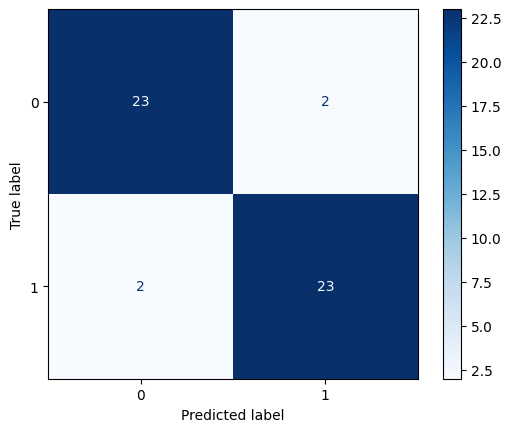

In [ ]:
# Étape 7: Afficher la matrice de confusion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print(f"\nMeilleur k trouvé : {best_k} avec une précision de {best_accuracy:.2%}")

knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_vin_scaled, y_train_vin)

y_pred_best = knn_best.predict(X_test_vin_scaled)

cm = confusion_matrix(y_test_vin, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_best.classes_)
disp.plot(cmap='Blues')



## Prochaines étapes recommandées :

1. **Pratiquer** avec d'autres datasets (Kaggle, UCI ML Repository). 
  
2. **Explorer** d'autres algorithmes de scikit-learn. 
  
3. **Approfondir** la validation croisée et l'optimisation d'hyperparamètres. 
4. **Participer** à des compétitions ML (Kaggle)
  
5. **Construire** un projet personnel de bout en bout. 
  
  
Ressources utiles :
- Documentation scikit-learn : https://scikit-learn.org. 
  
- Tutoriels Kaggle : https://www.kaggle.com/learn. 
  
- Livre "Hands-On Machine Learning" de Aurélien Géron. 
  
Bon apprentissage !